In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
sots_lahutus = pd.read_csv("sots_lahutus.csv")
pikkus_lahutuseni = pd.read_csv("abielu_pikkus.csv")
maakond_lahutus = pd.read_csv("maakond_lahutus.csv")
kuud_maakonnad_lahutus = pd.read_csv("kuud_maakonnad_lahutus.csv")
abielud_kuud_maakonnad = pd.read_csv("abielud_kuud_maakonnad.csv")
abielud_vanused_sood = pd.read_csv("abielud_vanused_sood_maakonnad.csv")
sots_abielu = pd.read_csv("sots_abielud.csv")

In [57]:

maakond_lahutus = maakond_lahutus.rename(columns= {"Asustuspiirkonna liik" : "Asustuspiirkond"})

In [58]:
maakond_lahutus['Mehe elukoht'] = maakond_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')
kuud_maakonnad_lahutus['Mehe elukoht'] = kuud_maakonnad_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')
maakond_lahutus = maakond_lahutus.rename(columns={"Mehe elukoht":"Elukoht"})
kuud_maakonnad_lahutus = kuud_maakonnad_lahutus.rename(columns={"Mehe elukoht":"Elukoht"})
kuud_maakonnad_lahutus = kuud_maakonnad_lahutus.rename(columns={"Kuud kokku":"Lahutused kokku"})

C:\Users\karin\AppData\Local\Temp\ipykernel_10816\3113499986.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  maakond_lahutus['Mehe elukoht'] = maakond_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')
C:\Users\karin\AppData\Local\Temp\ipykernel_10816\3113499986.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  kuud_maakonnad_lahutus['Mehe elukoht'] = kuud_maakonnad_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')


In [59]:
kuud_maakonnad_koos = kuud_maakonnad_lahutus.assign(Lastetu = maakond_lahutus["0 last"],
                                  Üks_laps = maakond_lahutus["1 laps"],
                                  Kaks_last = maakond_lahutus["2 last"],
                                  Kolm_last = maakond_lahutus["3 last"],
                                  Neli_last = maakond_lahutus["4 last"],
                                  Viis_või_enam_last = maakond_lahutus["5 või enam last"],
                                  Teadmata = maakond_lahutus["Ühiste laste arv teadmata"])

       Jaanuar  Veebruar  Märts  Aprill  Mai  Juuni  Juuli  August  September  \
Aasta                                                                           
2017       302       327    385     317  417    315    304     363        380   
2018       309       311    356     323  336    356    354     314        358   
2019       280       282    307     257  296    270    303     316        324   
2020       278       248    255     120  153    273    381     328        362   
2021       143       182    192     212  214    320    543     502        304   

       Oktoober  November  Detsember  
Aasta                                 
2017        364       413        404  
2018        410       359        359  
2019        344       298        300  
2020        314       310        323  
2021        249       239        255  


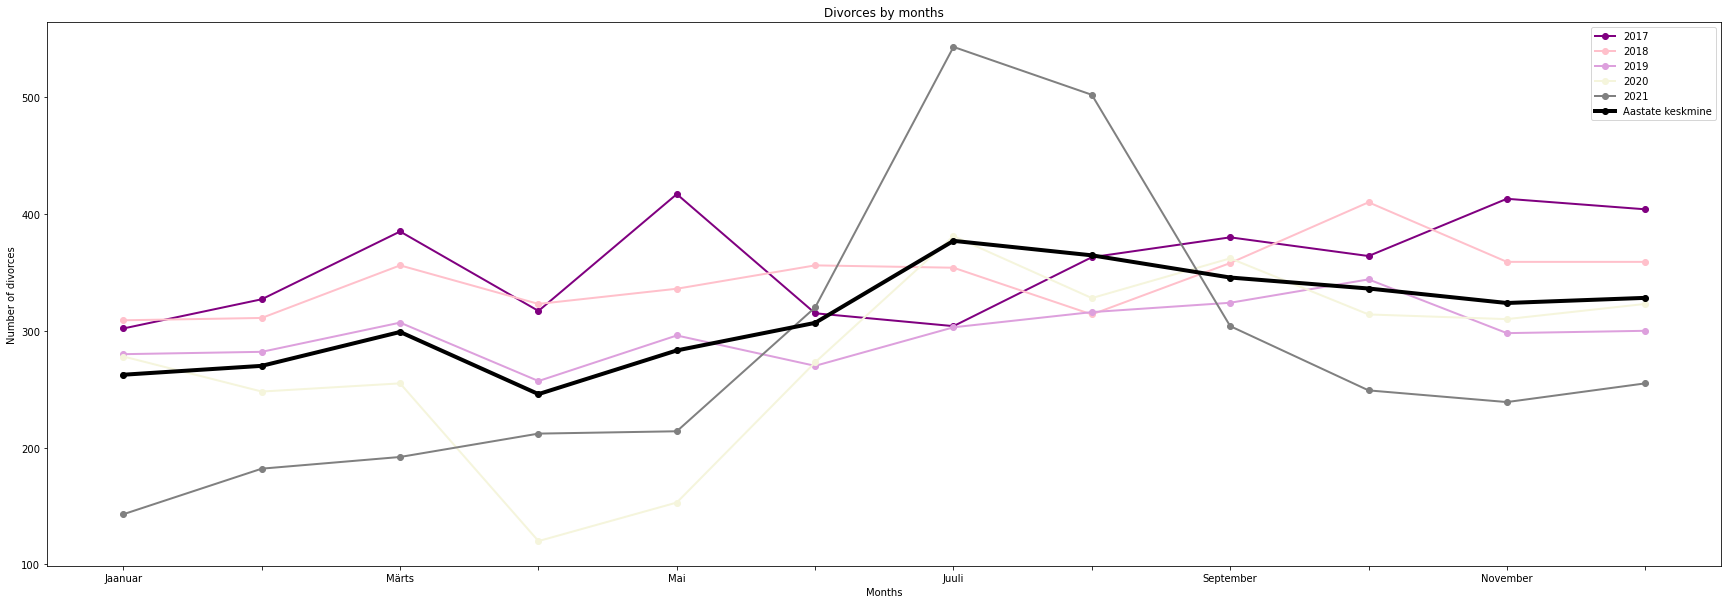

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from calendar import month_name as mn

summad = kuud_maakonnad_koos.groupby("Aasta").sum()
summad= summad.drop(columns = ["Lahutused kokku"])
summadesummad = summad.sum()
kuud = mn[1:]
print(summad)
i = 0

colors = ['purple', 'pink', 'plum', 'beige', 'gray']
y= [1312/5, 1350/5, 1495/5, 1229/5, 1416/5, 1534/5, 1885/5, 1823/5, 1728/5,1681/5,1619/5, 1641/5]

for index, row in summad.iterrows():

    row.plot(kind = 'line', color = str(colors[i]),  marker='o',figsize=(30, 10), label=str(index), linewidth=2)
    i+=1
plt.xlabel('Months') 
plt.ylabel('Number of divorces') 
plt.title("Divorces by months")
plt.plot(kuud, y,color = "black", marker='o', label="Aastate keskmine", linewidth=4)
plt.xticks(kuud) 
plt.legend()
plt.savefig('kuud.pdf')


plt.show()


